In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.tree import plot_tree
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('Demographic_Data.csv')
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
#Preprocessing
#Discretize age and creating array by dicing
#Fav linkage: https://pbpython.com/pandas-qcut-cut.html
custom_bucket_array = ([1, 9, 19, 29, 39, 49, 59, 69, 79, 89])
custom_bucket_array

[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]

In [7]:
custom_bucket_arrayb = (0, 1000, 2000, 3000)
df['amount_label'] = pd.cut(df['amount'], custom_bucket_arrayb, labels = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   in-store      80000 non-null  int64  
 1   age           80000 non-null  int64  
 2   items         80000 non-null  int64  
 3   amount        80000 non-null  float64
 4   region        80000 non-null  int64  
 5   amount_label  80000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.7 MB


### In order to analyze the feature of amounts, the data had to be sliced via an array of bucketed ages

In [8]:
df['age_label'] = pd.cut(df['age'], custom_bucket_array, labels = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   in-store      80000 non-null  int64  
 1   age           80000 non-null  int64  
 2   items         80000 non-null  int64  
 3   amount        80000 non-null  float64
 4   region        80000 non-null  int64  
 5   amount_label  80000 non-null  int64  
 6   age_label     80000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.3 MB


### In order to analyze the feature of age, the data had to be sliced via an array of bucketed ages

In [9]:
df.head(20)

,in-store,age,items,amount,region,amount_label,age_label
0,0,37,4,281.0300,2,0,3
1,0,35,2,219.5100,2,0,3
2,1,45,3,1525.7000,4,1,4
3,1,46,3,715.2500,3,0,4
4,1,33,4,1937.5000,1,1,3
5,0,24,3,1314.2000,4,1,2
6,0,43,6,8.5472,2,0,4
7,1,66,5,819.9800,3,0,6
8,1,51,5,908.3100,1,0,5
9,1,47,3,767.5400,1,0,4


In [10]:
df = df.drop(columns = ['age'])

In [11]:
df = df.drop(columns = ['amount'])

In [12]:
df.head()

,in-store,items,region,amount_label,age_label
0,0,4,2,0,3
1,0,2,2,0,3
2,1,3,4,1,4
3,1,3,3,0,4
4,1,4,1,1,3


In [13]:
#Modeling
algos_class = []
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Random Tree Classifier', RandomForestClassifier()))
algos_class.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)))

In [14]:
#Dependent variable of In-store
x = df[['region', 'items', 'amount_label', 'age_label']]
print(x.head())

y = df['in-store']
print(y.head())

   region  items  amount_label  age_label
0       2      4             0          3
1       2      2             0          3
2       4      3             1          4
3       3      3             0          4
4       1      4             1          3
0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64


In [15]:
#Train and test for in-store dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

print('Data shape', x_train.shape, y_train.shape)

Data shape (56000, 4) (56000,)


### Multiple errors in training and testing. Needed to ensure that the correct train and test variables were being utilized. Must also ensure a viable split is being done so that the train set has enough data and test set can have enough to validate the algorithm predictions.

In [16]:
#Classification
results = []
names = []

for name, model in algos_class:
    result = cross_val_score (model, x_test, y_test, cv=5, scoring ='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Decision Tree Classifier 0.8774583333333332
Random Tree Classifier 0.8774166666666666
K Nearest Neighbors 0.8478749999999999


In [17]:
print(results)
print(names)
print(name)
print(model)
print(result)

[array([0.87770833, 0.87541667, 0.87729167, 0.881875  , 0.875     ]), array([0.876875  , 0.87458333, 0.87875   , 0.881875  , 0.875     ]), array([0.834375  , 0.84166667, 0.86270833, 0.85833333, 0.84229167])]
['Decision Tree Classifier', 'Random Tree Classifier', 'K Nearest Neighbors']
K Nearest Neighbors
KNeighborsClassifier(n_neighbors=3)
[0.834375   0.84166667 0.86270833 0.85833333 0.84229167]


In [18]:
#Modeling classification PoA needs () after decision tree
algo = DecisionTreeClassifier(max_depth=3)
dtcFit1 = algo.fit(x_train, y_train)

#Prediction and report
preds = dtcFit1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.81     11831
           1       0.76      1.00      0.86     12169

    accuracy                           0.84     24000
   macro avg       0.88      0.84      0.83     24000
weighted avg       0.88      0.84      0.83     24000



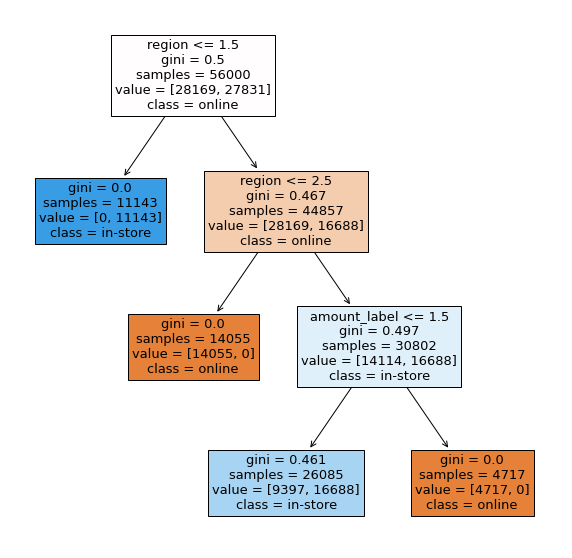

In [19]:
plt.figure(figsize=(10,10))
plot_tree(dtcFit1,
         feature_names = x.columns,
         class_names =['online','in-store'],
          filled = True,
          fontsize = 13,
          max_depth = 3)
plt.show()

### Limiting the depth of this chart allowed for better results

In [20]:
#Dependent variable of Age
x = df[['region', 'items', 'amount_label', 'in-store']]
print(x.head())

y = df['age_label']
print(y.head())

   region  items  amount_label  in-store
0       2      4             0         0
1       2      2             0         0
2       4      3             1         1
3       3      3             0         1
4       1      4             1         1
0    3
1    3
2    4
3    4
4    3
Name: age_label, dtype: int64


In [21]:
 #Train and test for in-store dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

print('Data shape', x_train.shape, y_train.shape)

Data shape (56000, 4) (56000,)


In [22]:
#Classification
results = []
names = []

for name, model in algos_class:
    result = cross_val_score (model, x_test, y_test, cv=5, scoring ='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Decision Tree Classifier 0.21583333333333332
Random Tree Classifier 0.2152083333333333
K Nearest Neighbors 0.20270833333333332


In [23]:
print(results)
print(names)
print(name)
print(model)
print(result)

[array([0.21479167, 0.21395833, 0.21520833, 0.21520833, 0.22      ]), array([0.21270833, 0.21541667, 0.21666667, 0.21416667, 0.21708333]), array([0.19916667, 0.21208333, 0.20083333, 0.19791667, 0.20354167])]
['Decision Tree Classifier', 'Random Tree Classifier', 'K Nearest Neighbors']
K Nearest Neighbors
KNeighborsClassifier(n_neighbors=3)
[0.19916667 0.21208333 0.20083333 0.19791667 0.20354167]


In [24]:
#Modeling classification PoA needs () after decision tree
algo = DecisionTreeClassifier(max_depth=3)
dtcFit1 = algo.fit(x_train, y_train)

#Prediction and report
preds = dtcFit1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       288
           2       0.24      0.18      0.21      3817
           3       0.22      0.53      0.31      5278
           4       0.22      0.28      0.24      5392
           5       0.22      0.06      0.09      4385
           6       0.00      0.00      0.00      2689
           7       0.00      0.00      0.00      1560
           8       0.00      0.00      0.00       591

    accuracy                           0.22     24000
   macro avg       0.11      0.13      0.11     24000
weighted avg       0.17      0.22      0.17     24000



C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Dependent variable of Amount
x = df[['region', 'items', 'in-store', 'age_label']]
print(x.head())

y = df['amount_label']
print(y.head())

   region  items  in-store  age_label
0       2      4         0          3
1       2      2         0          3
2       4      3         1          4
3       3      3         1          4
4       1      4         1          3
0    0
1    0
2    1
3    0
4    1
Name: amount_label, dtype: int64


In [26]:
 #Train and test for in-store dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

print('Data shape', x_train.shape, y_train.shape)

Data shape (56000, 4) (56000,)


In [27]:
#Classification
results = []
names = []

for name, model in algos_class:
    result = cross_val_score (model, x_test, y_test, cv=5, scoring ='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Decision Tree Classifier 0.7091666666666667
Random Tree Classifier 0.7091666666666667
K Nearest Neighbors 0.6967083333333333


In [28]:
print(results)
print(names)
print(name)
print(model)
print(result)

[array([0.71125   , 0.71416667, 0.71      , 0.70604167, 0.704375  ]), array([0.713125  , 0.71354167, 0.70979167, 0.70625   , 0.703125  ]), array([0.695625  , 0.691875  , 0.71145833, 0.68666667, 0.69791667])]
['Decision Tree Classifier', 'Random Tree Classifier', 'K Nearest Neighbors']
K Nearest Neighbors
KNeighborsClassifier(n_neighbors=3)
[0.695625   0.691875   0.71145833 0.68666667 0.69791667]


In [29]:
#Modeling classification PoA needs () after decision tree
algo = DecisionTreeClassifier(max_depth=3)
dtcFit1 = algo.fit(x_train, y_train)

#Prediction and report
preds = dtcFit1.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     16740
           1       0.43      0.62      0.51      5226
           2       0.00      0.00      0.00      2034

    accuracy                           0.71     24000
   macro avg       0.42      0.48      0.45     24000
weighted avg       0.68      0.71      0.69     24000



C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
